<a href="https://colab.research.google.com/github/bojrick/Lending-Club/blob/master/Lending_Club.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Data


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd /content/drive/Shared\ drives/Data\ Mining\ Assignments/Sid/Assignment\ 1

/content/drive/Shared drives/Data Mining Assignments/Sid/Assignment 1


In [0]:
import pandas as pd
import numpy as np


lc_data = pd.read_csv('lcData4m.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
lc_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,7000,7000,7000,36 months,0.14,239.21,C,C4,facility operator,2 years,RENT,78000.0,Verified,2015-09-01T00:00:00Z,Charged Off,n,NaN,NaN,other,Other,585xx,ND,21.62,1,Sep-11,660,664,0,10.0,NaN,8,0,5695,0.80,20,f,0,0,...,0,68213,59105,6000,61113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,6000,6000,6000,36 months,0.14,205.04,C,C4,Team Lead,10+ years,MORTGAGE,30000.0,Verified,2015-09-01T00:00:00Z,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,146xx,NY,25.28,0,Nov-09,685,689,1,NaN,NaN,10,0,12113,0.51,17,f,0,0,...,0,117932,29181,19700,18962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4000,4000,4000,36 months,0.12,133.42,C,C1,Production Painter,1 year,RENT,16400.0,Not Verified,2015-09-01T00:00:00Z,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,973xx,OR,38.73,7,Jul-05,660,664,0,18.0,NaN,14,0,8339,0.67,23,f,0,0,...,0,38725,39380,9200,26325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,12000,12000,12000,36 months,0.12,400.24,C,C1,Security Hospital Treatment Aide,10+ years,RENT,80000.0,Not Verified,2015-09-01T00:00:00Z,Charged Off,n,NaN,NaN,credit_card,Credit card refinancing,100xx,NY,9.69,0,May-06,665,669,0,NaN,78.0,12,1,8105,0.49,16,f,0,0,...,0,28224,14015,9200,11524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Aug-19,COMPLETE,Aug-18,1282.0,45.01,12.0
4,NaN,NaN,2500,2500,2500,36 months,0.18,90.21,D,D5,Marketing Manager,5 years,RENT,50000.0,Source Verified,2015-09-01T00:00:00Z,Fully Paid,n,NaN,NaN,moving,Moving and relocation,900xx,CA,20.38,0,Oct-05,675,679,1,NaN,NaN,11,0,13117,0.82,30,f,0,0,...,0,52613,49340,11600,36513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


# Data Exploration

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
sns.set(color_codes=True)

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Default Rate of Loan

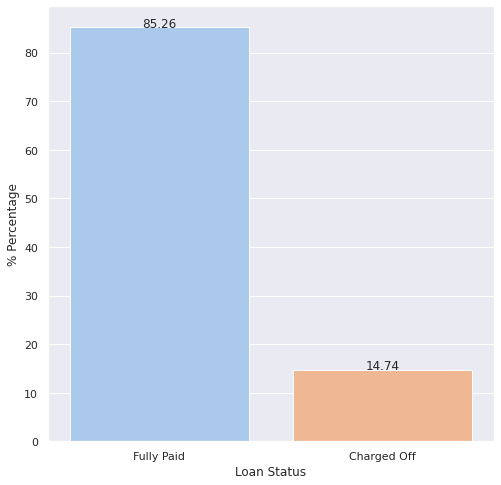

In [0]:
loan_status_counts = pd.DataFrame({"Loan Status":list(set(lc_data['loan_status'])),"% Percentage":lc_data['loan_status'].value_counts(normalize = True)*100})
plt.figure(figsize=(8,8))
loan_status_plot = sns.barplot(x="Loan Status",y="% Percentage",data=loan_status_counts,palette="pastel")
show_values_on_bars(loan_status_plot)
#for p in loan_status_plot.patches:
 #   loan_status_plot.annotate(int(p.get_width()),((p.get_x() + p.get_width()), p.get_y()), xytext=(1, -18),fontsize=15,color='#004d00',textcoords='offset points', horizontalalignment='center',va='center')

In [0]:
grades = list(set(lc_data['grade']))
grades.sort()
sub_grades = list(set(lc_data['sub_grade']))
sub_grades.sort()

###By Grade

In [0]:
by_grade = lc_data.groupby("grade")['loan_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

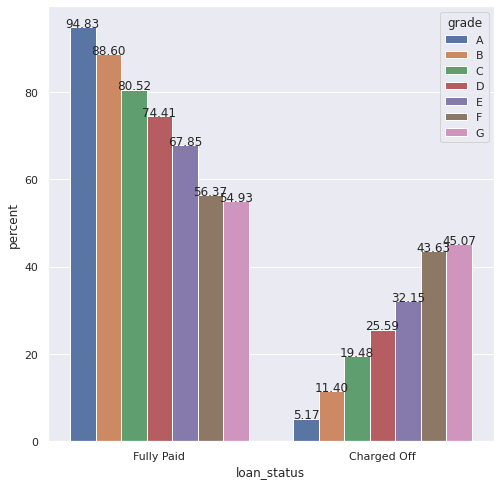

In [0]:
plt.figure(figsize=(8,8))
grade_count_by_status = sns.barplot(x='loan_status',y='percent',hue='grade',hue_order=grades,data=by_grade)
show_values_on_bars(grade_count_by_status)

###By Subgrade

In [0]:
by_subgrade = lc_data.groupby("sub_grade")['loan_status'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

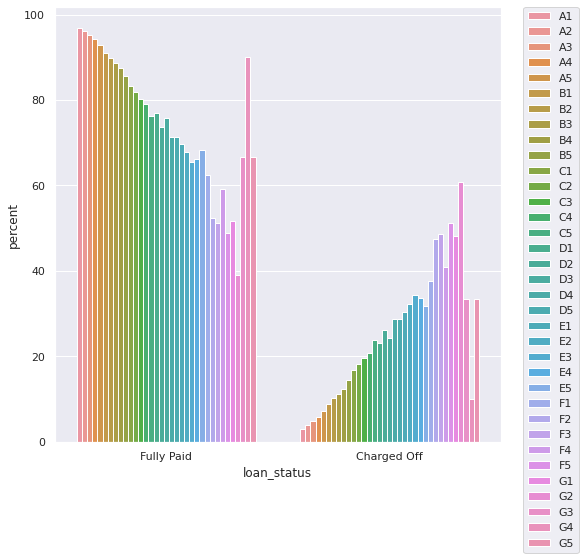

In [0]:
plt.figure(figsize=(8,8))
subgrade_count_by_status = sns.barplot(x='loan_status',y='percent',hue='sub_grade',hue_order=sub_grades,data=by_subgrade)
#show_values_on_bars(subgrade_count)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

##Percentage of Loan

###By Grade

In [0]:
grade_count = lc_data['grade'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

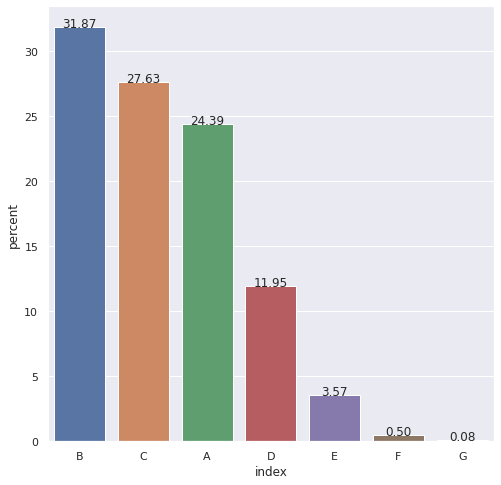

In [0]:
plt.figure(figsize=(8,8))
grade_count = sns.barplot(x='index',y='percent',data=grade_count)
show_values_on_bars(grade_count)

###By Subgrade

In [0]:
subgrade_count = lc_data['sub_grade'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

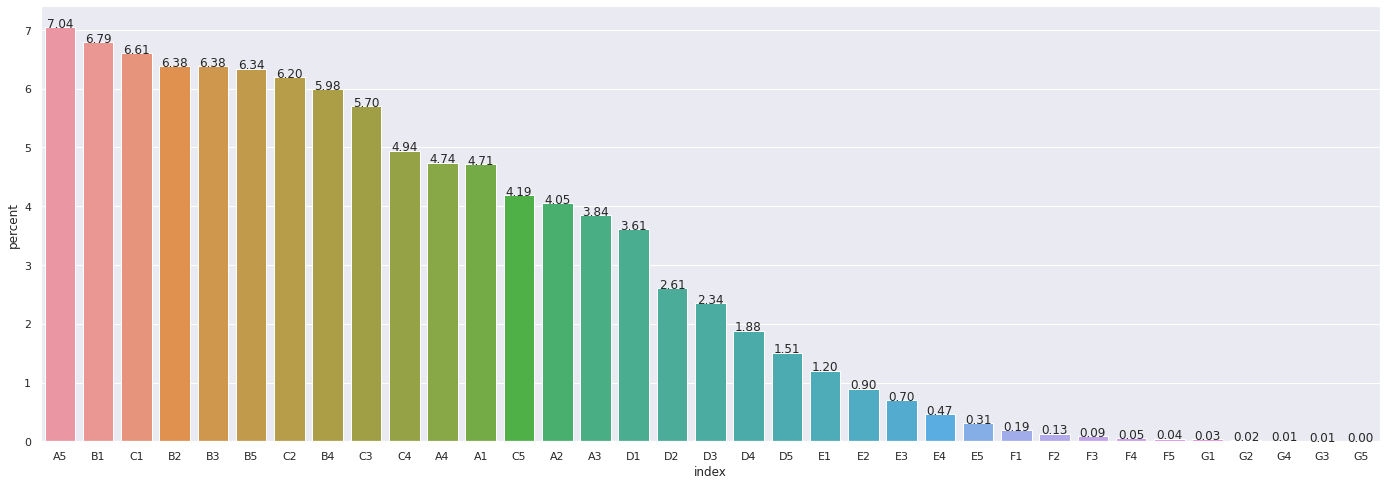

In [0]:
plt.figure(figsize=(24,8))
subgrade_count = sns.barplot(x='index',y='percent',data=subgrade_count)
show_values_on_bars(subgrade_count)

###By Purpose

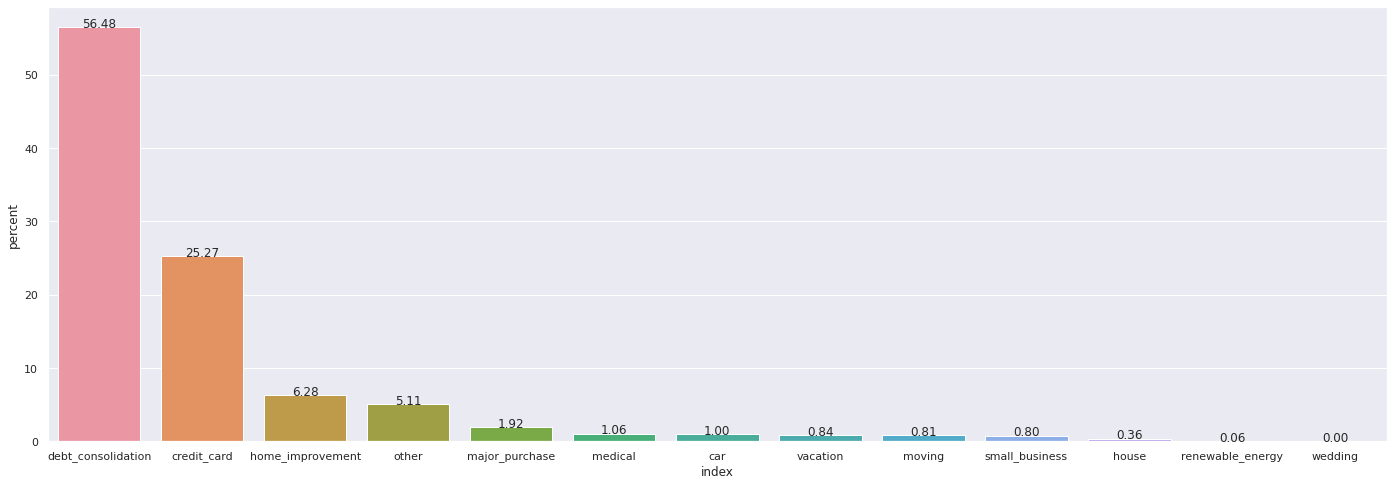

In [0]:
purpose_counts = lc_data.purpose.value_counts(normalize=True).mul(100).rename("percent").reset_index()
plt.figure(figsize=(24,8))
purpose_plot = sns.barplot(x='index',y='percent',data=purpose_counts)
show_values_on_bars(purpose_plot)

##Loan amounts by Grade

In [0]:
loan_amt_by_grade = lc_data.groupby("grade")["loan_amnt"]
mean_loan_amt_by_grade = lc_data.groupby("grade")["loan_amnt"].mean().rename('mean_loan_amnt').reset_index()

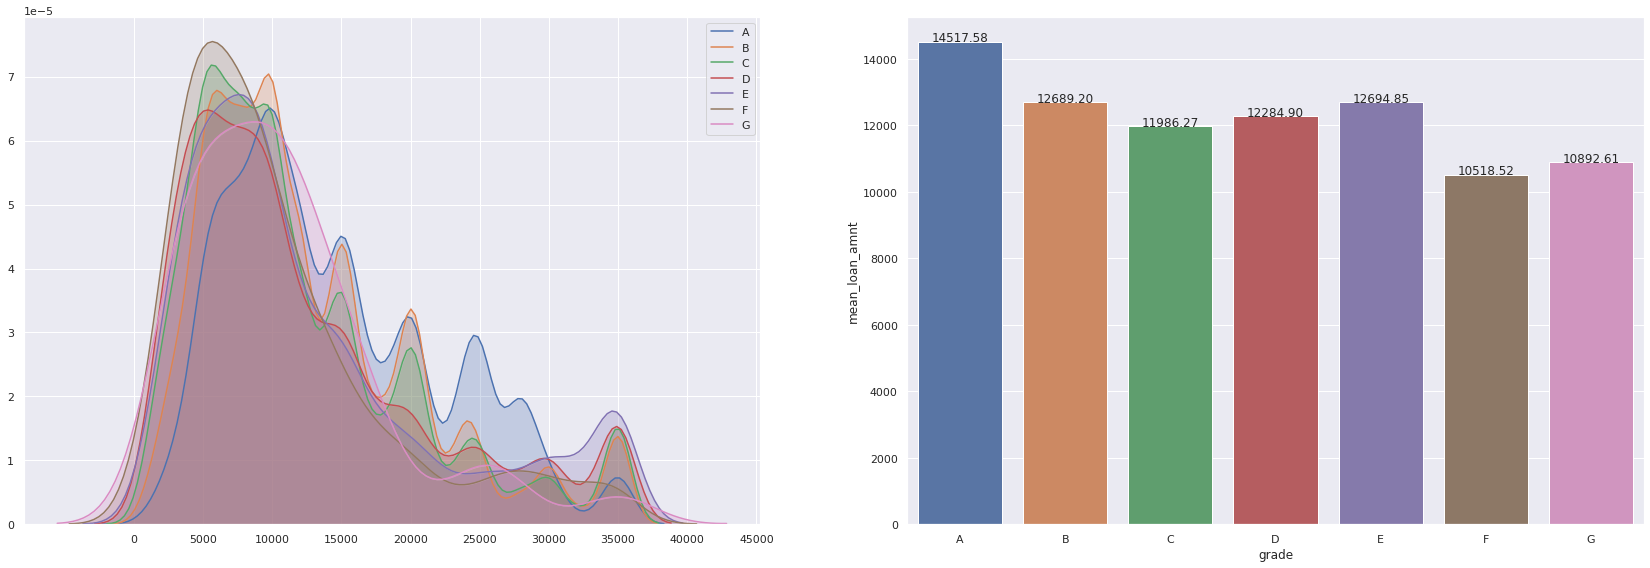

In [0]:
fig,ax = plt.subplots(1,2,figsize=(12,8))
fig.subplots_adjust(bottom=0.000012,right=2)

for i in grades:
  sns.kdeplot(loan_amt_by_grade.get_group(i),shade=True,label=i,ax=ax[0]).set(xticks=np.arange(0,50000,5000))

mean_loan_amnt = sns.barplot(x='grade',y='mean_loan_amnt',data=mean_loan_amt_by_grade,ax=ax[1])
show_values_on_bars(mean_loan_amnt)

##Interest Rate By Grade

In [0]:
int_rate_by_grade = lc_data.groupby("grade")["int_rate"]
mean_int_rate_by_grade = lc_data.groupby("grade")["int_rate"].mean().rename('mean_int_rate').reset_index()

In [0]:
mean_int_rate_by_grade

,grade,mean_int_rate
0,A,0.067369
1,B,0.099580
2,C,0.132399
3,D,0.169781
4,E,0.189640
5,F,0.232765
6,G,0.273099


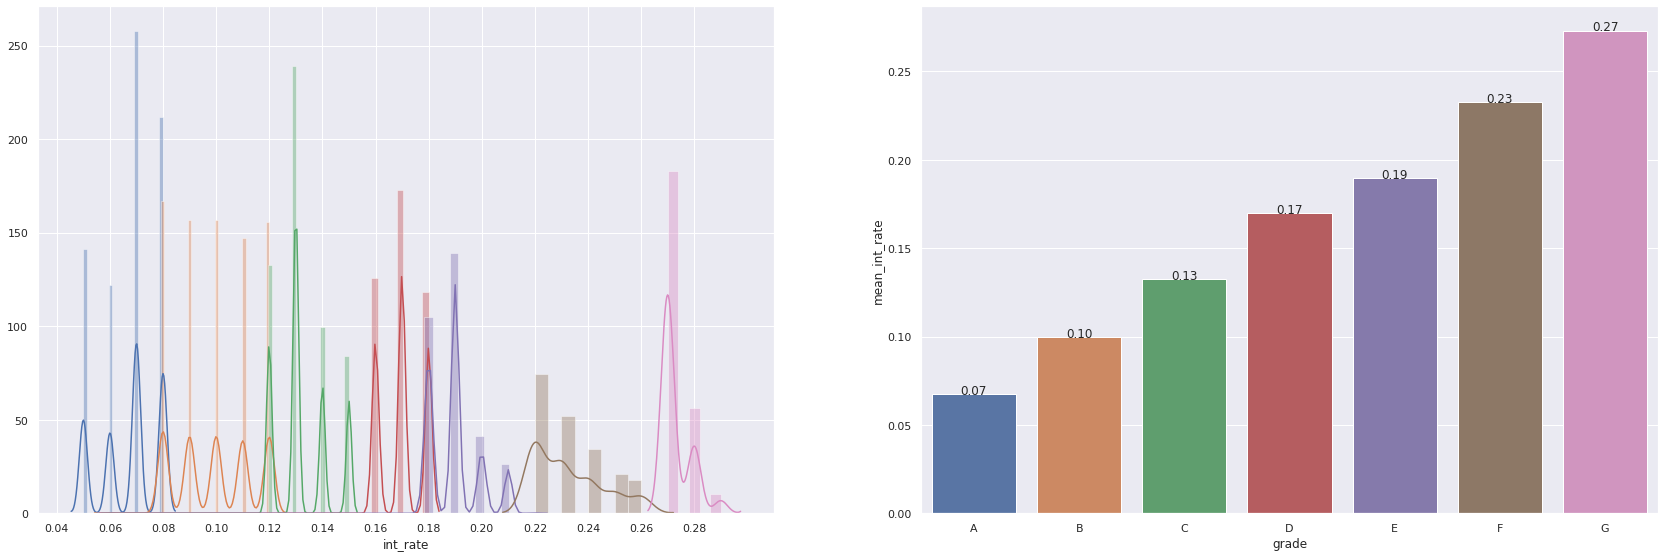

In [0]:
fig,ax = plt.subplots(1,2,figsize=(12,8))
fig.subplots_adjust(bottom=0.000012,right=2)

for i in grades:
  sns.distplot(int_rate_by_grade.get_group(i),kde=True,label=i,ax=ax[0]).set(xticks=np.arange(0.04,0.30,0.02))

mean_int_rate = sns.barplot(x='grade',y='mean_int_rate',data=mean_int_rate_by_grade,ax=ax[1])
show_values_on_bars(mean_int_rate)

##Grade of Loans by Purpose

In [0]:
grade_by_purpose = lc_data.groupby('purpose')["grade"].value_counts(normalize=True).rename("percent").reset_index()

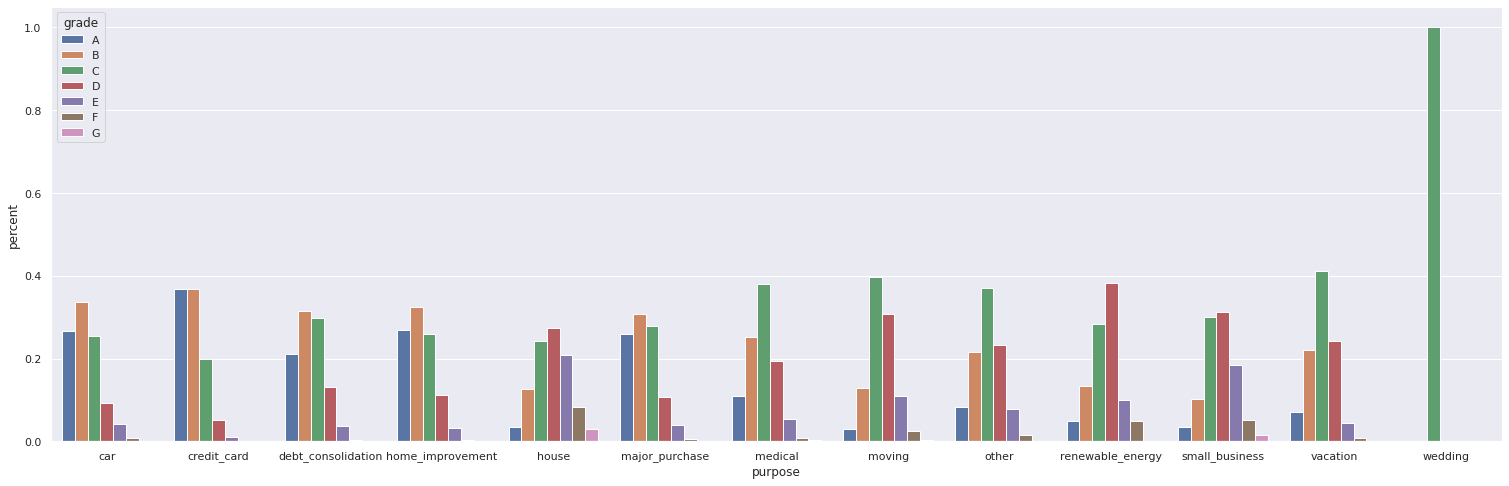

In [0]:
plt.figure(figsize=(26,8))
grade_by_purpose_plot = sns.barplot(x='purpose',y='percent',hue='grade',hue_order=grades,data=grade_by_purpose)
#show_values_on_bars(grade_by_purpose_plot)

##Default Rate of Loan by Purpose

In [0]:
default_by_purpose = lc_data.groupby('purpose')["loan_status"].value_counts(normalize=True).mul(100).rename("percent").reset_index()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


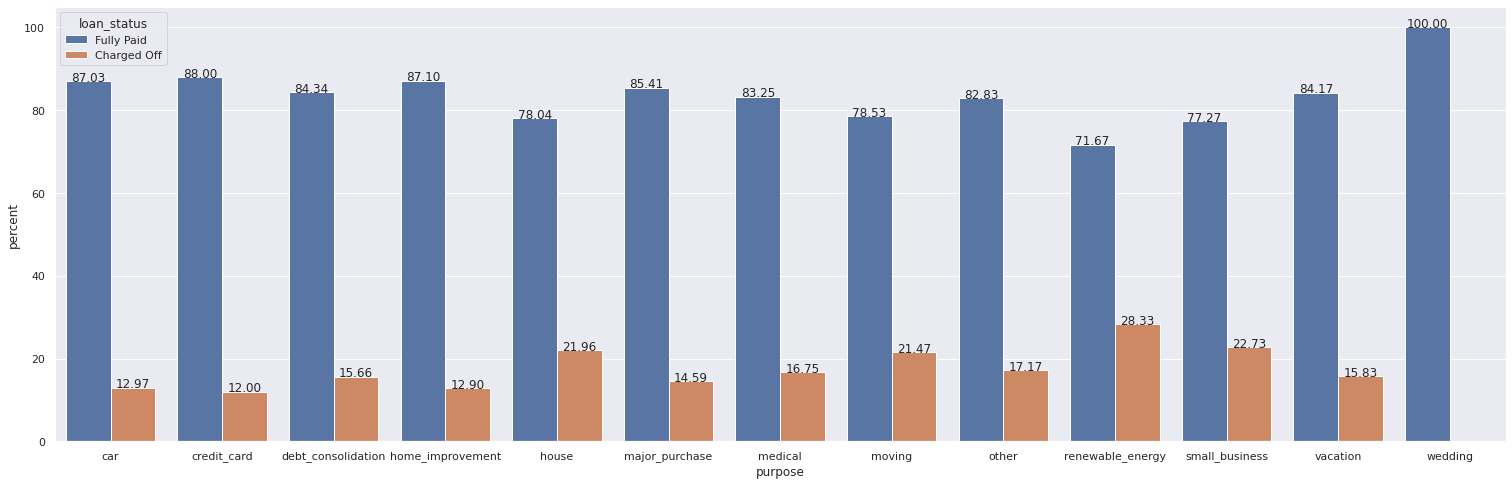

In [0]:
plt.figure(figsize=(26,8))
default_by_purpose_plot = sns.barplot(x='purpose',y='percent',hue='loan_status',data=default_by_purpose)
show_values_on_bars(default_by_purpose_plot)

#Annual Return

In [0]:
lc_data['annual_return']=((lc_data['total_pymnt']-lc_data['funded_amnt'])/lc_data['funded_amnt'])*1200/36

##Average Annual Return by Interest Rate

In [0]:
ann_return_by_int_rate = lc_data.groupby('int_rate')["annual_return"]
mean_ann_return_by_int_rate = lc_data.groupby("int_rate")["annual_return"].mean().rename('mean_ann_return').reset_index()

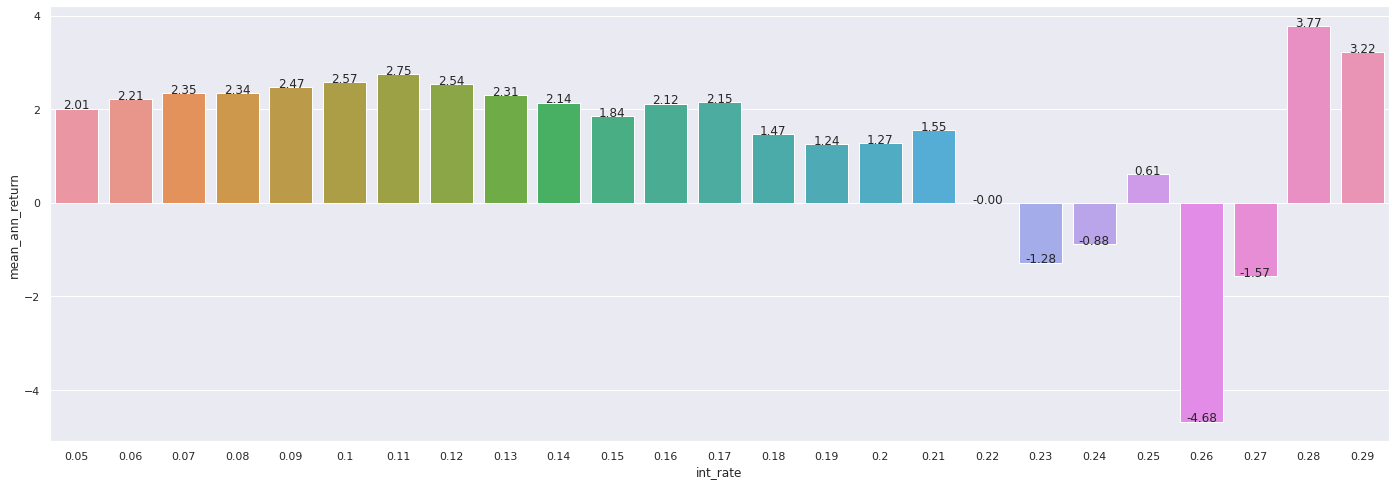

In [0]:
plt.figure(figsize=(24,8))
mean_ann_return_by_int_rate_plot = sns.barplot(x='int_rate',y='mean_ann_return',data=mean_ann_return_by_int_rate)
show_values_on_bars(mean_ann_return_by_int_rate_plot)

##Average Annual Return by Grade

In [0]:
ann_return_by_grade = lc_data.groupby('grade')["annual_return"]
mean_ann_return_by_grade = lc_data.groupby("grade")["annual_return"].mean().rename('mean_ann_return').reset_index()

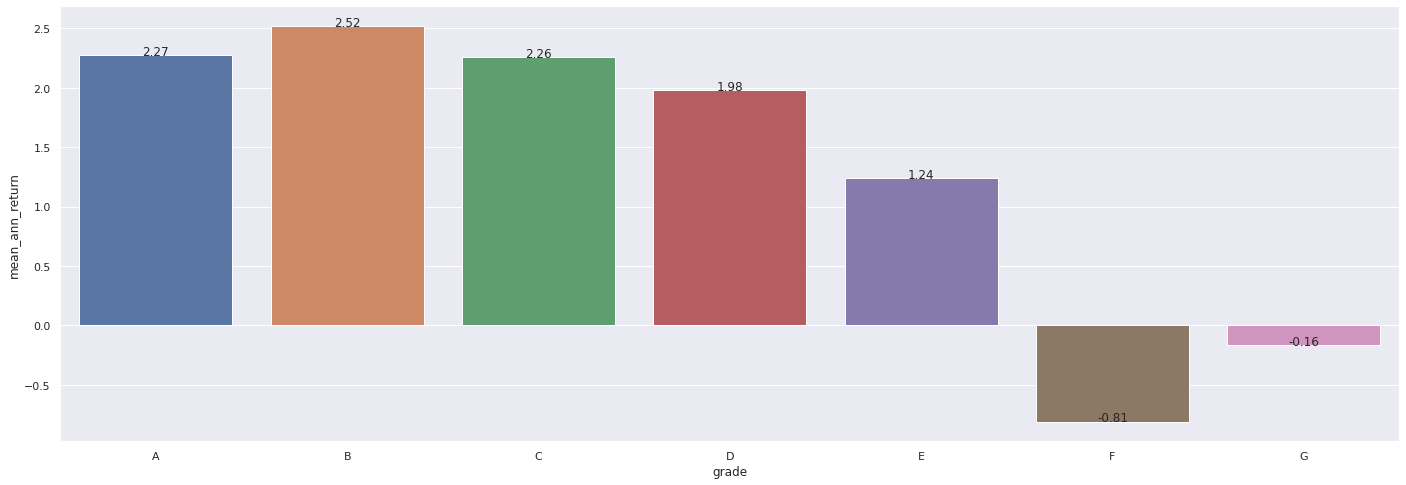

In [0]:
plt.figure(figsize=(24,8))
mean_ann_return_by_grade_plot = sns.barplot(x='grade',y='mean_ann_return',data=mean_ann_return_by_grade)
show_values_on_bars(mean_ann_return_by_grade_plot)

##Average Annual Return by Subgrade

In [0]:
ann_return_by_subgrade = lc_data.groupby('sub_grade')["annual_return"]
mean_ann_return_by_subgrade = lc_data.groupby("sub_grade")["annual_return"].mean().rename('mean_ann_return').reset_index()

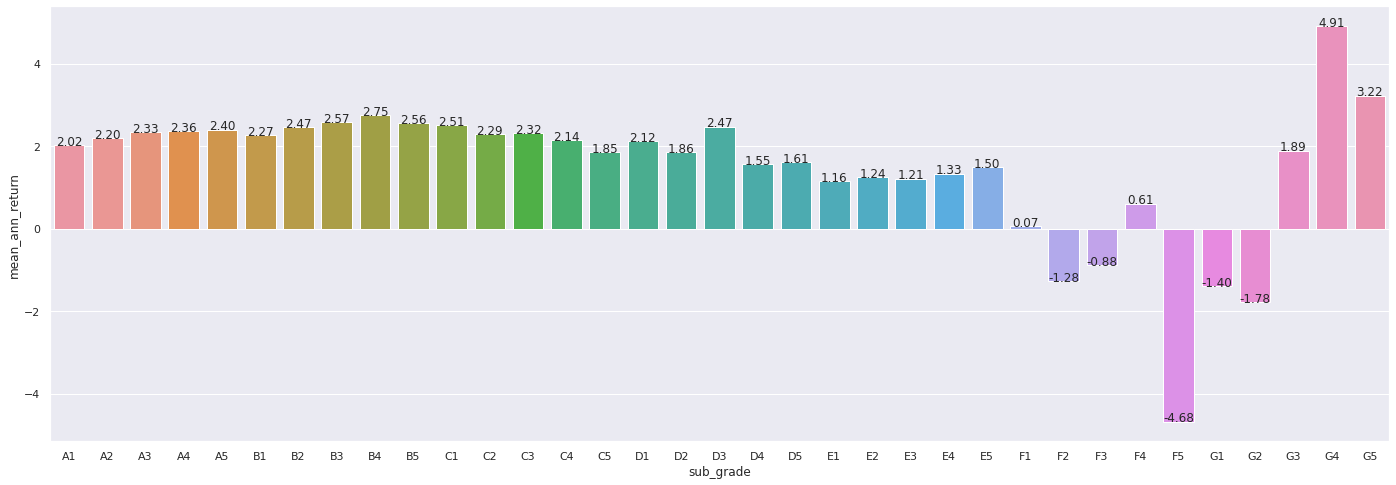

In [0]:
plt.figure(figsize=(24,8))
mean_ann_return_by_subgrade_plot = sns.barplot(x='sub_grade',y='mean_ann_return',data=mean_ann_return_by_subgrade)
show_values_on_bars(mean_ann_return_by_subgrade_plot)

In [0]:
pd.DataFrame(lc_data.isnull().sum()).transpose()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,annual_return
0,92623,92624,0,0,0,0,0,0,0,0,6112,6114,0,0,0,0,0,0,92624,92624,0,0,0,0,0,0,0,0,0,0,44684,75280,0,0,0,50,0,0,0,0,...,0,0,0,0,92624,92624,92624,92624,92624,92624,92624,92624,92624,92624,92624,92624,92624,0,92624,92624,92624,92624,92624,92624,92624,92624,92624,92624,92624,92624,92624,92624,0,90470,90470,90470,90470,90470,90470,0


In [0]:
import re
lc_data.emp_length[lc_data.emp_length.notnull()] = [int(re.findall(r'\d+',text)[0]) for text in lc_data.emp_length[lc_data.emp_length.notnull()]]
lc_data['emp_length'] = lc_data.emp_length.fillna(lc_data.emp_length.mean())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
lc_data['mths_since_last_delinq'] = lc_data.mths_since_last_delinq.fillna(0)

In [0]:
lc_data['revol_util']=lc_data.revol_util.fillna(0)

In [0]:
lc_data['emp_title']=lc_data.emp_title.fillna('Not Given')

In [0]:
lc_data['mths_since_last_record']=lc_data.mths_since_last_record.fillna(lc_data.mths_since_last_record.mean())

In [0]:
lc_data['issue_d'] = pd.to_datetime(lc_data.issue_d,errors='coerce').dt.tz_localize(None)

In [0]:
lc_data['earliest_cr_line'] = pd.to_datetime(lc_data.earliest_cr_line,format='%b-%y',errors='coerce')
lc_data['earliest_cr_line'] = ((lc_data['issue_d']-lc_data['earliest_cr_line'])/np.timedelta64(1, 'M')).astype(int)

In [0]:
lc_data['last_credit_pull_d'] = pd.to_datetime(lc_data.last_credit_pull_d,format='%b-%y',errors='coerce')
lc_data['last_credit_pull_d'] = ((lc_data['last_credit_pull_d']-lc_data['issue_d'])/np.timedelta64(1, 'M')).astype(int)

In [0]:
nansum = pd.DataFrame(lc_data.isnull().sum()).transpose()
remove = [col for col in list(lc_data.columns) if nansum[col][0] != 0]
remove.extend(['term','policy_code','application_type','out_prncp','out_prncp_inv','purpose','zip_code','issue_d','hardship_flag','pymnt_plan','emp_title'])
clean_data = lc_data.drop(remove,axis=1)

In [0]:
clean_data.shape

(92624, 74)

In [0]:
clean_data.tail()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,title,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag,annual_return
92619,17100,17100,17100,0.14,584.36,C,C4,BUS DRIVER,10.0,RENT,43000.0,Source Verified,Charged Off,Debt consolidation,CA,18.70,0,309,675,679,2,77.0,79.00000,20,1,10970,0.39,38,w,11707.85000,11707.85,7661.41,2843.78,0.0,1202.66,216.4788,584.36,24,599,595,0,0,0,19466,28500,11,1145,0,0,309,2,2,1,0,3,7,4,6,10,17,27,7,20,0,0,4,96.9,1,0,39300,19466,10600,10800,N,-10.511014
92620,15000,15000,14975,0.14,512.60,C,C4,Member Relationship Specialist,10.0,MORTGAGE,46012.0,Source Verified,Fully Paid,Debt consolidation,CA,4.59,1,164,665,669,0,6.0,57.00000,11,1,3791,0.32,26,f,17765.96827,17736.36,15000.00,2765.97,0.0,0.00,0.0000,7175.63,48,709,705,0,0,0,27734,11900,6,2773,0,0,163,6,6,3,0,3,4,3,7,5,9,18,4,11,0,0,3,95.5,1,0,62083,3974,7300,183,N,6.146596
92621,8000,8000,8000,0.08,250.29,A,A5,Owner,10.0,MORTGAGE,94000.0,Source Verified,Fully Paid,Debt consolidation,GA,8.96,1,189,680,684,3,2.0,23.00000,14,9,5777,0.21,28,w,8937.61665,8937.62,8000.00,937.62,0.0,0.00,0.0000,2433.59,53,694,690,0,0,2069,169432,27200,3,13033,0,0,188,0,0,3,0,5,6,6,8,10,11,15,6,14,0,0,2,88.5,0,9,220084,15196,13900,20534,N,3.906736
92622,25000,25000,25000,0.17,885.73,D,D2,Director of Operations,3.0,MORTGAGE,104000.0,Verified,Fully Paid,Debt consolidation,AL,27.93,0,367,710,714,0,0.0,65.93675,17,0,37444,0.83,29,w,32065.51614,32065.52,25000.00,7065.52,0.0,0.00,0.0000,59.23,50,724,720,0,0,0,456787,49600,1,26870,0,0,366,34,10,2,0,9,13,9,14,3,14,23,13,17,0,0,1,100.0,0,0,491449,97581,33100,44504,N,9.420688
92623,25000,25000,25000,0.07,768.28,A,A3,stock broker,5.0,MORTGAGE,110000.0,Verified,Fully Paid,Credit card refinancing,OH,13.38,0,276,675,679,0,0.0,65.93675,11,0,40369,0.92,15,w,27661.04512,27661.05,25000.00,2661.05,0.0,0.00,0.0000,768.08,53,659,655,0,0,0,167149,43800,3,15195,0,0,275,17,1,3,0,7,8,7,8,2,8,10,8,11,0,0,2,100.0,0,0,176065,55651,40200,19832,N,3.548060


In [0]:
clean_data[clean_data.select_dtypes(include=['object']).columns] = clean_data.select_dtypes(include=['object']).astype('category')

In [0]:
clean_data.select_dtypes(include=['category']).columns

Index(['grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'loan_status', 'title', 'addr_state',
       'initial_list_status', 'debt_settlement_flag'],
      dtype='object')

In [0]:
y = clean_data['loan_status']

In [0]:
X = clean_data.drop('loan_status',axis=1)

In [0]:
from sklearn.model_selection import  train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

In [0]:
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder

dtree = tree.DecisionTreeClassifier()
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

In [0]:
enc.fit(clean_data[clean_data.select_dtypes(include=['category']).columns])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=True)

In [0]:
enc.categories_[2].shape

(33174,)

In [0]:
xtrain.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,title,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,annual_return
11808,35000,35000,35000,0.07,1084.87,A,A4,FIREIFGHTER,10.0,MORTGAGE,150000.0,Source Verified,n,Debt consolidation,TX,15.86,0,209,735,739,0,0.0,65.93675,13,0,43822,0.72,39,w,39019.832700,39019.83,35000.00,4019.83,0.00,0.00,0.0000,4318.11,50,634,630,0,0,0,135335,60700,1,11278,0,0,209,19,19,1,0,4,7,4,14,6,11,32,7,13,0,0,0,100.0,0,0,216760,66521,46100,42860,N,N,3.828412
50788,35000,35000,34975,0.11,1145.69,B,B4,Service Engineer 2,10.0,RENT,74500.0,Source Verified,n,Debt consolidation,VT,8.63,0,192,700,704,0,60.0,65.93675,6,0,7136,0.44,14,f,41202.072820,41172.64,35000.00,6202.07,0.00,0.00,0.0000,1145.66,36,764,760,0,0,0,12816,16400,1,2136,0,0,193,76,20,1,2,3,4,3,5,5,5,8,4,6,0,0,0,85.7,0,0,29181,12816,15000,12781,N,N,5.906736
1829,8000,8000,7900,0.08,251.36,B,B1,account amanger,10.0,MORTGAGE,75000.0,Source Verified,n,Car financing,MN,19.09,6,124,695,699,0,18.0,65.93675,16,0,3903,0.38,22,f,9046.211129,8933.13,8000.00,1046.21,0.00,0.00,0.0000,251.18,46,599,595,0,0,0,234976,10300,2,14686,0,0,45,37,18,2,1,1,2,3,3,14,5,5,2,16,0,0,0,68.2,0,0,281935,51050,5900,57750,N,N,4.359213
58713,12000,12000,12000,0.13,406.24,C,C3,Service Coordinator,2.0,RENT,70000.0,Not Verified,n,Debt consolidation,CA,14.40,0,83,670,674,1,24.0,65.93675,19,0,7707,0.51,36,w,12819.390000,12819.39,12000.00,799.08,20.31,0.00,0.0000,20.94,52,699,695,0,0,0,33773,15100,6,1876,0,0,84,2,2,0,8,3,6,3,6,21,9,15,6,19,0,0,4,77.1,0,0,51817,33773,8500,36717,N,N,2.276083
65868,20000,20000,20000,0.13,670.90,C,C2,staff,10.0,MORTGAGE,94000.0,Source Verified,n,Medical expenses,IL,19.16,1,198,710,714,0,9.0,65.93675,7,0,6807,0.32,29,w,5946.490000,5946.49,1392.83,591.67,0.00,3961.99,713.1582,670.90,15,579,575,0,0,0,342509,21000,2,48930,1,0,198,45,18,4,1,2,3,1,10,9,3,16,3,6,0,1,0,96.6,0,0,380900,75084,14400,61900,N,N,-23.422517


In [0]:
dtree.fit(xtrain,ytrain)